
# Priyanka Marwadi
# Logistic Regression from scratch


## README

    I have programmed in Jupyter Notebook with python version - 3.9

    You can open the Jupyter notebook and run cell by cell cell or full code together.

    dataset file needs to be in same folder as the code or the dataset_name variable can be chnaged with location of file at top of the code.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for jupyter notebook
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Input 2a
dataset_name = 'diabetic_data_final.csv' 
df = pd.read_csv(dataset_name)
length_of_df = len(df)
training_data_length = round(length_of_df*0.6) # take around 60% data samples as training dataset
validation_data_length = round(length_of_df*0.2) # take around 20% data samples as validation data set
# remaining dataset will be test data set that will be around 20% 
df_23 = df.filter(items=['time_in_hospital','age', 'num_lab_procedures', 'num_procedures', 'num_medications',
'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'insulin','diabetesMed'])  # seperating the desired data from rest of dataset

# Mapping
age_map = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3,'[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9 }
insulin_map = {'No':0, 'Steady':1, 'Up':2, 'Down':3} # Mapping values to interger calculations
diabeticsMed_map = {'No':0, 'Yes':1} # Mapping values to interger calculations

df_23.age = [age_map[item] for item in df_23.age] # Replacing string data in insulin with mapped integers
df_23.insulin = [insulin_map[item] for item in df_23.insulin] # Replacing string data in insulin with mapped integers
df_23.diabetesMed = [diabeticsMed_map[item] for item in df_23.diabetesMed] # Replacing string data in insulin with mapped integers

feature_1 = ['num_lab_procedures'] 
feature_10 = ['age', 'num_lab_procedures', 'num_procedures', 'num_medications',
'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'insulin','diabetesMed']
feature_predict = ['time_in_hospital']
x_2a = df_23.filter(items=feature_1)
x_3a = df_23.filter(items=feature_10)
y = df_23.filter(items=feature_predict)

x_2a_training = x_2a[0:training_data_length] # select data from start to length of training data
x_3a_training = x_3a[0:training_data_length] # select data from start to length of training data
y_training = y[0:training_data_length] # select data from start to length of training data
x_2a_validation = x_2a[training_data_length:training_data_length+validation_data_length].reset_index(drop=True) # select data after training dataset with length of validation data
x_3a_validation = x_3a[training_data_length:training_data_length+validation_data_length].reset_index(drop=True) # select data after training dataset with length of validation data
y_validation = y[training_data_length:training_data_length+validation_data_length].reset_index(drop=True) # select data after training dataset with length of validation data
x_2a_testing = x_2a[training_data_length+validation_data_length:].reset_index(drop=True) # remaining data will be test data
x_3a_testing = x_3a[training_data_length+validation_data_length:].reset_index(drop=True) # remaining data will be test data
y_testing = y[training_data_length+validation_data_length:].reset_index(drop=True) # remaining data will be test data

x_2a_training = x_2a_training.values
x_3a_training = x_3a_training.values
y_training = y_training.values

x_2a_validation = x_2a_validation.values
x_3a_validation = x_3a_validation.values
y_validation = y_validation.values

x_2a_testing = x_2a_testing.values
x_3a_testing = x_3a_testing.values
y_testing = y_testing.values


## Logistic Regression Functions

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict(X,W,B):
    
    # X --> Input data.
    # Normalizing the inputs.
    # X = normalize(X)
    
    # Calculating presictions/y_hat.
    X = X.T

    Z = np.dot(W.T, X) + B
    y_hat = sigmoid(Z)
    
    y_hat = y_hat >= 0.5
    
    y_hat = np.array(y_hat, dtype = 'int64')
        
    return y_hat

def trainLogisticRegression(X, Y, learning_rate=0.001, iterations=30000): #, tol=1e-6)
    '''
    This function returns values of weights, bias and losses for trained model
    input:
        X --> Input feature set
        y --> True output values for training sets
        learning_rate --> learning rate 
        iterations --> number of iterations
    output:
        W --> Theta parameter
        B --> Bias
        costlist --> matric of all the cost with iterations
    '''
    m,n = X.shape
    #m-> number of training values (number of rows)
    #n-> number of features (number of colums)

    # preprocess shape data shape
    X = X.T
    Y = Y.reshape(1, m)

    # Initializing weights, bias and losses.
    W = np.zeros((n,1))
    B = 0
    costlist = []
    
    for i in range(iterations):
        
        sig = np.dot(W.T, X) + B
        A = sigmoid(sig)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        costlist.append(cost)
        
        # if(i%(iterations/10) == 0):
        #     print("cost after ", i, "iteration is : ", cost)

        # # if we want to stop based on tolerence
        # if len(costlist) > 2:
        #     loss_change = np.abs(costlist[-2]-costlist[-1])
        #     # print(w['time_in_hospital'][0], loss_change)
        #     if loss_change < tol:
        #         break
        #     else:
        #         continue
        
    # returning weights, bias and losses(List).
    return W, B, costlist

class model_evaluation:
    def __init__(self,y,y_predict):
        y = y.flatten()
        y_predict = y_predict.flatten()

        T0 = 0 #True zero, TN
        T1 = 0 #True one, TP
        F0 = 0 #False zero, FN
        F1 = 0 #False one, FP
        for i in range(len(y)):
            if y[i] == y_predict[i]:
                if y[i] == 0:
                    T0 += 1
                else:
                    T1 += 1
            else:
                if y[i] == 0:
                    F1 += 1
                else:
                    F0 += 1
        try:
            self.precision0 = T0/(F0+T0)
        except:
            self.precision0 = 0    # to avoid infinite looping
        try:
            self.recall0 = T0/(F1+T0)
        except:
            self.recall0 = 0
        try:
            self.F1score0 = (2*self.precision0*self.recall0)/ (self.precision0+self.recall0)
        except:
            self.F1score0 = 0
        try:
            self.precision1 = T1/(F1+T1)
        except:
            self.precision1 = 0
        try:
            self.recall1 = T1/(F0+T1)
        except:
            self.recall1 = 0
        try:
            self.F1score1 = (2*self.precision1*self.recall1)/ (self.precision1+self.recall1)
        except:
            self.F1score1 = 0

        self.macroF1 = round((self.F1score0+self.F1score1)/2,4)
        self.weightedF1 = round((((T0+F1)*self.F1score0)+((T1+F0)*self.F1score1))/(T1 + F0 + T0 + F1),4)

        self.performace_matric = pd.DataFrame()
        self.performace_matric['Precision'] = [round(self.precision0,2), round(self.precision1,2)] 
        self.performace_matric['Recall'] = [round(self.recall0,2), round(self.recall1,2)]
        self.performace_matric['F1-score'] = [round(self.F1score0,2), round(self.F1score1,2)]

        self.accuracy = (T1 + T0)/ (T1 + F0 + T0 + F1)
        self.confusion_matrix = pd.DataFrame()
        self.confusion_matrix[0] = [T0, F1] 
        self.confusion_matrix[1] = [F0, T1]

## 2. Logistic Regression using 1 Feature

### 2a. Logistic Regression model training 
        One input feature 
        feature: ‘num_medications’
        predict: ‘time_in_hospital’ 

In [4]:
w_2a,b_2a,l_2a = trainLogisticRegression(x_2a_training,y_training)  # training model
print("Logistic Regression Training One feature")
print('Weight')
print(w_2a)
print('bias')
print(b_2a)

Logistic Regression Training One feature
Weight
[[0.01641791]]
bias
-1.046938919496674


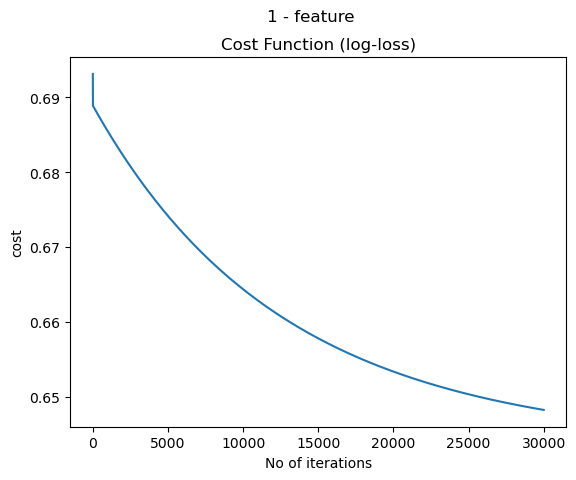

In [5]:
# Cost function plot
plt.plot(np.arange(len(l_2a)), l_2a)
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("1 - feature")
plt.show()

### 2b. Logistic Regression model performance evaluation on testing data 
        One input feature 
        feature: ‘num_medications’
        predict: ‘time_in_hospital’ 

In [6]:
# Evaluation of model performace on testing data
y_2a_testing_predict = predict(x_2a_testing,w_2a,b_2a)    # performing testing
eval_2a = model_evaluation(y_testing,y_2a_testing_predict)  # getting evaluation parameters such as performance matric, acccuracy, F1 scaore etc

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_2a.performace_matric) 
print("Confusion Matrix:")
print(eval_2a.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_2a.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_2a.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_2a.accuracy*100, 2), "%")


Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.72    0.91      0.80
1       0.64    0.30      0.41
Confusion Matrix:
       0     1
0  12250  4826
1   1180  2097
Macro-F1 score of the model is :  0.61
Weighted-F1 score of the model is :  0.67
Accuracy of the model is :  70.49 %


## 3. Logistic Regression using 10 Feature

### 3a. Logistic Regression model training 
        Ten input feature 
        feature: 'age', 'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 
                'number_emergency', 'number_inpatient','number_diagnoses', 'insulin','diabetesMed'
        predict: ‘time_in_hospital’ 

In [7]:
w_3a,b_3a,l_3a = trainLogisticRegression(x_3a_training,y_training)  # training model with 10 features
print("Logistic Regression Training 10 feature")
print('Weight ( length =', len(w_3a),")")
print(w_3a)
print('bias')
print(b_3a)

Logistic Regression Training 10 feature
Weight ( length = 10 )
[[-0.11424943]
 [ 0.00630377]
 [ 0.01911217]
 [ 0.08627212]
 [-0.076433  ]
 [-0.14011621]
 [ 0.05640849]
 [-0.01719093]
 [ 0.02112102]
 [-0.3913867 ]]
bias
-0.8642880937352863


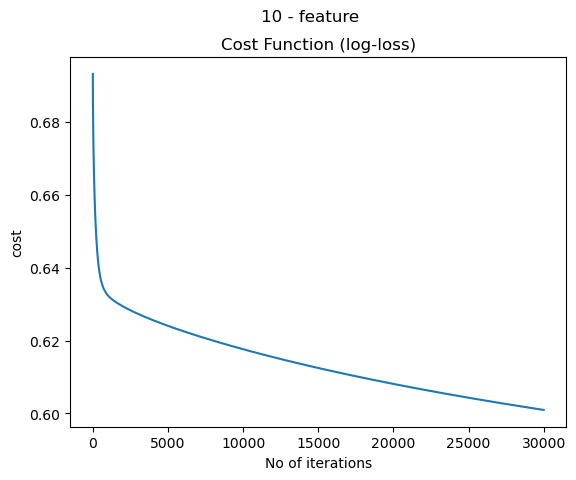

In [8]:
# Cost function plot
plt.plot(np.arange(len(l_3a)), l_3a)
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("10 - feature")
plt.show()

In [9]:
# Evaluation of model performace on testing data
y_3a_testing_predict = predict(x_3a_testing,w_3a,b_3a)
eval_3a = model_evaluation(y_testing,y_3a_testing_predict)

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_3a.performace_matric) 
print("Confusion Matrix:")
print(eval_3a.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_3a.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_3a.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_3a.accuracy*100, 2), "%")


Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.77    0.82      0.80
1       0.60    0.53      0.57
Confusion Matrix:
       0     1
0  11016  3242
1   2414  3681
Macro-F1 score of the model is :  0.68
Weighted-F1 score of the model is :  0.72
Accuracy of the model is :  72.21 %


### 3b. Forward Selction

In [10]:
# Feature Select [one variable]
best_feature_combination = []              # for finally selected features
f1score_list_fs1 = []
for i in range(len(feature_10)):       # for all 10 features
    x_fs1_training = x_3a_training[:,i].reshape(x_2a_training.shape[0],1)
    x_fs1_testing = x_3a_testing[:,i].reshape(x_2a_testing.shape[0],1)
    w_fs1,b_fs1,l_fs1 = trainLogisticRegression(x_fs1_training,y_training,learning_rate=0.001)  
    y_fs1_testing_predict = predict(x_fs1_testing,w_fs1,b_fs1)
    eval_fs1 = model_evaluation(y_testing,y_fs1_testing_predict)
    f1score_list_fs1.append(eval_fs1.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_10)
print("Weighted F1 score list=",f1score_list_fs1)
best_index_fs1 = f1score_list_fs1.index(max(f1score_list_fs1))
print("best Weighted F1 score list=",max(f1score_list_fs1), ", index =",best_index_fs1)
best_feature_combination.append(feature_10[best_index_fs1])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.5246, 0.6698, 0.5834, 0.722, 0.5246, 0.5246, 0.5387, 0.5286, 0.5869, 0.5246]
best Weighted F1 score list= 0.722 , index = 3
Best feature= ['num_medications']


In [11]:
# Feature Select [two variable]
feature_9 = feature_10.copy()
feature_9.remove(str(feature_10[best_index_fs1]))  # eleminate best feature selected from previous iteration
f1score_list_fs2 = []
for i in range(len(feature_9)):      # compute for all remaining 9 features
    x_fs2_training = x_3a_training[:,(best_index_fs1,i)]
    x_fs2_testing = x_3a_testing[:,(best_index_fs1,i)]
    w_fs2,b_fs2,l_fs2 = trainLogisticRegression(x_fs2_training,y_training,learning_rate=0.001) # combine other features one by one with 1st feature and train
    y_fs2_testing_predict = predict(x_fs2_testing,w_fs2,b_fs2)    # test this model
    eval_fs2 = model_evaluation(y_testing,y_fs2_testing_predict)  # get evaluation 
    f1score_list_fs2.append(eval_fs2.weightedF1)   # store all in one 
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_9)
print("Weighted F1 score list=",f1score_list_fs2)
best_index_fs2 = f1score_list_fs2.index(max(f1score_list_fs2)) # choose best combination
print("best Weighted F1 score list=",max(f1score_list_fs2), ", index =",best_index_fs2)
best_feature_combination.append(feature_9[best_index_fs2])  # store best in one 
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.7033, 0.7321, 0.7188, 0.722, 0.7196, 0.7205, 0.7217, 0.7142, 0.7207]
best Weighted F1 score list= 0.7321 , index = 1
Best feature= ['num_medications', 'num_lab_procedures']


In [12]:
# Feature Select [three variable]
feature_8 = feature_9.copy()
feature_8.remove(str(feature_9[best_index_fs2]))
f1score_list_fs3 = []
for i in range(len(feature_8)):
    x_fs3_training = x_3a_training[:,(best_index_fs1,best_index_fs2,i)]
    x_fs3_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,i)]
    w_fs3,b_fs3,l_fs3 = trainLogisticRegression(x_fs3_training,y_training,learning_rate=0.001)
    y_fs3_testing_predict = predict(x_fs3_testing,w_fs3,b_fs3)
    eval_fs3 = model_evaluation(y_testing,y_fs3_testing_predict)
    f1score_list_fs3.append(eval_fs3.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_8)
print("Weighted F1 score list=",f1score_list_fs3)
best_index_fs3 = f1score_list_fs3.index(max(f1score_list_fs3))
print("best Weighted F1 score list=",max(f1score_list_fs3), ", index =",best_index_fs3)
best_feature_combination.append(feature_8[best_index_fs3])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.7153, 0.7321, 0.7294, 0.7321, 0.7298, 0.7292, 0.7307, 0.7242]
best Weighted F1 score list= 0.7321 , index = 1
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures']


In [13]:
# Feature Select [Four variable]
feature_7 = feature_8.copy()
feature_7.remove(str(feature_8[best_index_fs3]))
f1score_list_fs4 = []
for i in range(len(feature_7)):
    x_fs4_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,i)]
    x_fs4_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,i)]
    w_fs4,b_fs4,l_fs4 = trainLogisticRegression(x_fs4_training,y_training,learning_rate=0.001)
    y_fs4_testing_predict = predict(x_fs4_testing,w_fs4,b_fs4)
    eval_fs4 = model_evaluation(y_testing,y_fs4_testing_predict)
    f1score_list_fs4.append(eval_fs4.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_7)
print("Weighted F1 score list=",f1score_list_fs4)
best_index_fs4 = f1score_list_fs4.index(max(f1score_list_fs4))
print("best Weighted F1 score list=",max(f1score_list_fs4), ", index =",best_index_fs4)
best_feature_combination.append(feature_7[best_index_fs4])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.7153, 0.7321, 0.7294, 0.7321, 0.7298, 0.7292, 0.7307]
best Weighted F1 score list= 0.7321 , index = 1
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient']


In [14]:
# Feature Select [Five variable]
feature_6 = feature_7.copy()
feature_6.remove(str(feature_7[best_index_fs4]))
f1score_list_fs5 = []
for i in range(len(feature_6)):
    x_fs5_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,i)]
    x_fs5_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,i)]
    w_fs5,b_fs5,l_fs5 = trainLogisticRegression(x_fs5_training,y_training,learning_rate=0.001)
    y_fs5_testing_predict = predict(x_fs5_testing,w_fs5,b_fs5)
    eval_fs5 = model_evaluation(y_testing,y_fs5_testing_predict)
    f1score_list_fs5.append(eval_fs5.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_6)
print("Weighted F1 score list=",f1score_list_fs5)
best_index_fs5 = f1score_list_fs5.index(max(f1score_list_fs5))
print("best Weighted F1 score list=",max(f1score_list_fs5), ", index =",best_index_fs5)
best_feature_combination.append(feature_6[best_index_fs5])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.7153, 0.6633, 0.7294, 0.7321, 0.7298, 0.7292]
best Weighted F1 score list= 0.7321 , index = 3
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_diagnoses']


In [15]:
# Feature Select [Six variable]
feature_5 = feature_6.copy()
feature_5.remove(str(feature_6[best_index_fs5]))
f1score_list_fs6 = []
for i in range(len(feature_5)):
    x_fs6_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,i)]
    x_fs6_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,i)]
    w_fs6,b_fs6,l_fs6 = trainLogisticRegression(x_fs6_training,y_training,learning_rate=0.001)
    y_fs6_testing_predict = predict(x_fs6_testing,w_fs6,b_fs6)
    eval_fs6 = model_evaluation(y_testing,y_fs6_testing_predict)
    f1score_list_fs6.append(eval_fs6.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_5)
print("Weighted F1 score list=",f1score_list_fs6)
best_index_fs6 = f1score_list_fs6.index(max(f1score_list_fs6))
print("best Weighted F1 score list=",max(f1score_list_fs6), ", index =",best_index_fs6)
best_feature_combination.append(feature_5[best_index_fs6])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_emergency', 'number_inpatient', 'insulin', 'diabetesMed']
Weighted F1 score list= [0.7153, 0.6091, 0.7294, 0.7324, 0.7296]
best Weighted F1 score list= 0.7324 , index = 3
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_diagnoses', 'insulin']


In [17]:
# Feature Select [Seven variable]
feature_4 = feature_5.copy()
feature_4.remove(str(feature_5[best_index_fs6]))
f1score_list_fs7 = []
for i in range(len(feature_4)):
    x_fs7_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,i)]
    x_fs7_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,i)]
    w_fs7,b_fs7,l_fs7 = trainLogisticRegression(x_fs7_training,y_training,learning_rate=0.001)
    y_fs7_testing_predict = predict(x_fs7_testing,w_fs7,b_fs7)
    eval_fs7 = model_evaluation(y_testing,y_fs7_testing_predict)
    f1score_list_fs7.append(eval_fs7.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_4)
print("Weighted F1 score list=",f1score_list_fs7)
best_index_fs7 = f1score_list_fs7.index(max(f1score_list_fs7))
print("best Weighted F1 score list=",max(f1score_list_fs7), ", index =",best_index_fs7)
best_feature_combination.append(feature_4[best_index_fs7])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_emergency', 'number_inpatient', 'diabetesMed']
Weighted F1 score list= [0.7153, 0.5652, 0.7294, 0.7324]
best Weighted F1 score list= 0.7324 , index = 3
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_diagnoses', 'insulin', 'diabetesMed']


In [18]:
# Feature Select [Eight variable]
feature_3 = feature_4.copy()
feature_3.remove(str(feature_4[best_index_fs7]))
f1score_list_fs8 = []
for i in range(len(feature_3)):
    x_fs8_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,best_index_fs7,i)]
    x_fs8_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,best_index_fs7,i)]
    w_fs8,b_fs8,l_fs8 = trainLogisticRegression(x_fs8_training,y_training,learning_rate=0.001)
    y_fs8_testing_predict = predict(x_fs8_testing,w_fs8,b_fs8)
    eval_fs8 = model_evaluation(y_testing,y_fs8_testing_predict)
    f1score_list_fs8.append(eval_fs8.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_3)
print("Weighted F1 score list=",f1score_list_fs8)
best_index_fs8 = f1score_list_fs8.index(max(f1score_list_fs8))
print("best Weighted F1 score list=",max(f1score_list_fs8), ", index =",best_index_fs8)
best_feature_combination.append(feature_3[best_index_fs8])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_emergency', 'number_inpatient']
Weighted F1 score list= [0.7153, 0.5292, 0.7294]
best Weighted F1 score list= 0.7294 , index = 2
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_diagnoses', 'insulin', 'diabetesMed', 'number_inpatient']


In [19]:
# Feature Select [Nine variable]
feature_2 = feature_3.copy()
feature_2.remove(str(feature_3[best_index_fs8]))
f1score_list_fs9 = []
for i in range(len(feature_2)):
    x_fs9_training = x_3a_training[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,best_index_fs7,best_index_fs8,i)]
    x_fs9_testing = x_3a_testing[:,(best_index_fs1,best_index_fs2,best_index_fs3,best_index_fs4,best_index_fs5,best_index_fs6,best_index_fs7,best_index_fs8,i)]
    w_fs9,b_fs9,l_fs9 = trainLogisticRegression(x_fs9_training,y_training,learning_rate=0.001)
    y_fs9_testing_predict = predict(x_fs9_testing,w_fs9,b_fs9)
    eval_fs9 = model_evaluation(y_testing,y_fs9_testing_predict)
    f1score_list_fs9.append(eval_fs9.weightedF1)
    
print("Logistic Regression Training One feature at times for Forward select")
print("feature list =", feature_2)
print("Weighted F1 score list=",f1score_list_fs9)
best_index_fs9 = f1score_list_fs9.index(max(f1score_list_fs9))
print("best Weighted F1 score list=",max(f1score_list_fs9), ", index =",best_index_fs9)
best_feature_combination.append(feature_2[best_index_fs9])
print("Best feature=", best_feature_combination)

Logistic Regression Training One feature at times for Forward select
feature list = ['age', 'number_emergency']
Weighted F1 score list= [0.712, 0.5309]
best Weighted F1 score list= 0.712 , index = 0
Best feature= ['num_medications', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_diagnoses', 'insulin', 'diabetesMed', 'number_inpatient', 'age']


In [20]:
# As best accuracy for "" variable features is less than "" variable best accuracy we will keep best feature combination of "" variables
best_feature_combination = best_feature_combination[:2]
print("Best feature combination from Froward Selct =", best_feature_combination)

Best feature combination from Froward Selct = ['num_medications', 'num_lab_procedures']


### 3c. Logistic Regression model training for Selcted Features 
        Forward selected two input feature 
        feature: 'num_medications', 'num_lab_procedures'
        predict: ‘time_in_hospital’ 

In [21]:
x_3c = df_23.filter(items=best_feature_combination)

x_3c_training = x_3c[0:training_data_length] # select data from start to length of training data
x_3c_validation = x_3c[training_data_length:training_data_length+validation_data_length].reset_index(drop=True) # select data after training dataset with length of validation data
x_3c_testing = x_3c[training_data_length+validation_data_length:].reset_index(drop=True) # remaining data will be test data
x_3c_training = x_3c_training.values
x_3c_validation = x_3c_validation.values
x_3c_testing = x_3c_testing.values

In [22]:

w_3c,b_3c,l_3c = trainLogisticRegression(x_3c_training,y_training,learning_rate=0.001)
print("Logistic Regression Training select features")
print('Weight ( length =', len(w_3c),")")
print(w_3c)
print('bias')
print(b_3c)

Logistic Regression Training select features
Weight ( length = 2 )
[[0.070786  ]
 [0.00297042]]
bias
-1.508439182127534


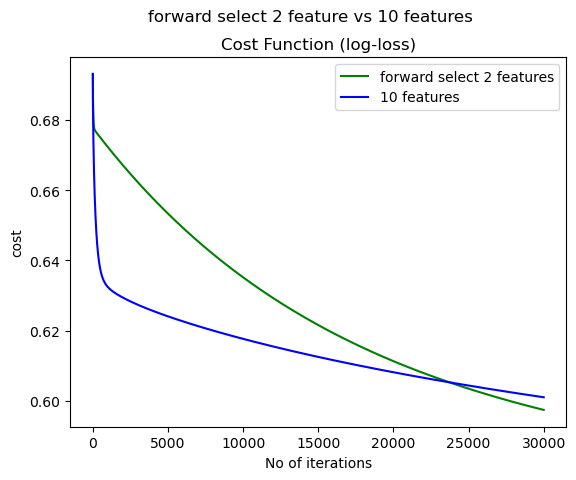

In [23]:
# Cost function plot
plt.plot(np.arange(len(l_3c)), l_3c, color='g', label='forward select 2 features')
plt.plot(np.arange(len(l_3a)), l_3a, color='b', label='10 features')
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("forward select 2 feature vs 10 features")
plt.legend()
plt.show()

In [24]:
# Evaluation of model performace on testing data
y_3c_testing_predict = predict(x_3c_testing,w_3c,b_3c)
eval_3c = model_evaluation(y_testing,y_3c_testing_predict)

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_3c.performace_matric) 
print("Confusion Matrix:")
print(eval_3c.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_3c.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_3c.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_3c.accuracy*100, 2), "%")

Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.79    0.82       0.8
1       0.62    0.57       0.6
Confusion Matrix:
       0     1
0  10975  2946
1   2455  3977
Macro-F1 score of the model is :  0.7
Weighted-F1 score of the model is :  0.73
Accuracy of the model is :  73.46 %


Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.77    0.82      0.80
1       0.60    0.53      0.57
Confusion Matrix:
       0     1
0  11016  3242
1   2414  3681
Macro-F1 score of the model is :  0.68
Weighted-F1 score of the model is :  0.72
Accuracy of the model is :  72.21 %

### 3d. Logistic Regression model training for Selcted Features different training sample size 
        Forward selected two input feature 
        feature: 'num_medications', 'num_lab_procedures'
        predict: ‘time_in_hospital’ 
        trainng sample size: [25000,50000,75000]

In [25]:
# Get training samples of given sizes
x_3d_training_25000 = x_3c[0:25000] # select data from start to length of training data
x_3d_training_50000 = x_3c[0:50000] # select data from start to length of training data
x_3d_training_75000 = x_3c[0:75000] # select data from start to length of training data
x_3d_training_25000 = x_3d_training_25000.values
x_3d_training_50000 = x_3d_training_50000.values
x_3d_training_75000 = x_3d_training_75000.values

y_3d_training_25000 = y[0:25000] # select data from start to length of training data
y_3d_training_50000 = y[0:50000] # select data from start to length of training data
y_3d_training_75000 = y[0:75000] # select data from start to length of training data
y_3d_training_25000 = y_3d_training_25000.values
y_3d_training_50000 = y_3d_training_50000.values
y_3d_training_75000 = y_3d_training_75000.values

In [28]:
# Training
w_3d_25000,b_3d_25000,l_3d_25000 = trainLogisticRegression(x_3d_training_25000,y_3d_training_25000,learning_rate=0.001)
print("Logistic Regression Training on select features and 250000 training sample size")
print('Weight ( length =', len(w_3c),")")
print(w_3d_25000)
print('bias')
print(b_3d_25000)
print()
w_3d_50000,b_3d_50000,l_3d_50000 = trainLogisticRegression(x_3d_training_50000,y_3d_training_50000,learning_rate=0.001)
print("Logistic Regression Training on select features and 500000 training sample size")
print('Weight ( length =', len(w_3c),")")
print(w_3d_50000)
print('bias')
print(b_3d_50000)
print()
w_3d_75000,b_3d_75000,l_3d_75000 = trainLogisticRegression(x_3d_training_75000,y_3d_training_75000,learning_rate=0.001)
print("Logistic Regression Training on select features and 750000 training sample size")
print('Weight ( length =', len(w_3c),")")
print(w_3d_75000)
print('bias')
print(b_3d_75000)
print()

Logistic Regression Training on select features and 250000 training sample size
Weight ( length = 2 )
[[0.07393356]
 [0.00579627]]
bias
-1.5600576456940747

Logistic Regression Training on select features and 500000 training sample size
Weight ( length = 2 )
[[0.07232082]
 [0.0028137 ]]
bias
-1.496140414200501

Logistic Regression Training on select features and 750000 training sample size
Weight ( length = 2 )
[[0.06838983]
 [0.00356868]]
bias
-1.5428211431269363



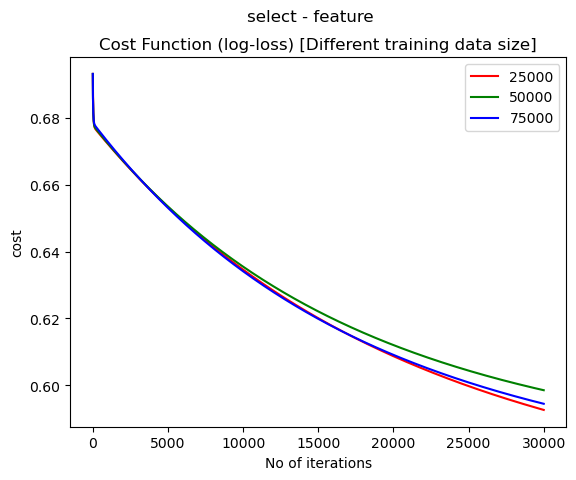

In [29]:
# Cost function plot
plt.plot(np.arange(len(l_3d_25000)), l_3d_25000, color='r', label='25000')
plt.plot(np.arange(len(l_3d_50000)), l_3d_50000, color='g', label='50000')
plt.plot(np.arange(len(l_3d_75000)), l_3d_75000, color='b', label='75000')
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss) [Different training data size]")
plt.suptitle("select - feature")
plt.legend()
plt.show()

## 4. Regularization and Cost Function


### 4a. Regularization and Feature Scaling


### 4ai. Regularization 


In [81]:
# Logistic regration with regularization function
def trainLogisticRegressionRegularized(X, Y, lam, learning_rate=0.001, iterations=30000): #tol=1e-6): 
    '''
    This function returns values of weights, bias and losses for trained model
    input:
        X --> Input feature set
        y --> True output values for training sets
        lam --> lamda (regularization )
        learning_rate --> learning rate 
        iterations --> number of iterations
    '''
    m,n = X.shape
    #m-> number of training values (number of rows)
    #n-> number of features (number of colums)

    # preprocess shape data shape
    X = X.T
    Y = Y.reshape(1, m)

    # Initializing weights, bias and losses.
    W = np.zeros((n,1))
    B = 0
    costlist = []
    
    for i in range(iterations):
        
        sig = np.dot(W.T, X) + B
        A = sigmoid(sig)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)) + ((lam*np.sum(W**2))/(2*m))
        
        
        # Regularization addition in gradient decent
        reg_add = (lam/m)*W

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T) + reg_add.T
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        costlist.append(cost)
        
        # if(i%(iterations/10) == 0):
        #     print("cost after ", i, "iteration is : ", cost)


        # if len(costlist) > 2:
        #     loss_change = np.abs(costlist[-2]-costlist[-1])
        #     # print(w['time_in_hospital'][0], loss_change)
        #     if loss_change < tol:
        #         break
        #     else:
        #         continue
        
    # returning weights, bias and losses(List).
    return W, B, costlist

In [83]:
# Best lamda selected lamda = 1
w_4ai,b_4ai,l_4ai = trainLogisticRegressionRegularized(x_3c_training,y_training,lam=1)
print("Logistic Regression Training 2 selected feature")
print('Weight ( length =', len(w_4ai),")")
print(w_4ai)
print('bias')
print(b_4ai)

Logistic Regression Training 2 selected feature
Weight ( length = 2 )
[[0.07078592]
 [0.00297043]]
bias
-1.5084387069149658


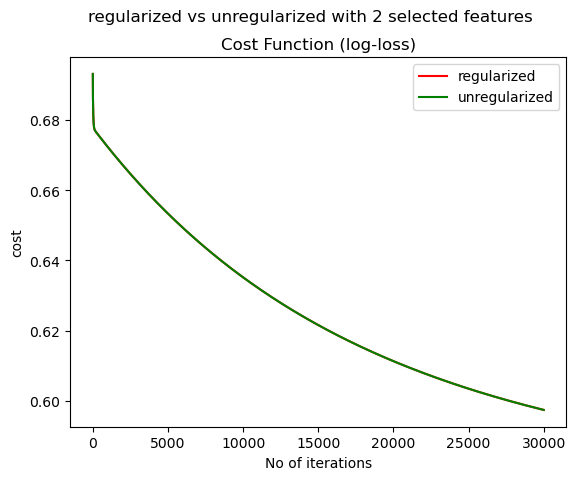

In [88]:
# Cost function plot
plt.plot(np.arange(len(l_4ai)), l_4ai, color='r', label='regularized')
plt.plot(np.arange(len(l_3c)), l_3c, color='g', label='unregularized')
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("regularized vs unregularized with 2 selected features")
plt.legend()
plt.show()

In [90]:
# Evaluation of model performace on testing data
y_4ai_testing_predict = predict(x_3c_testing,w_4ai,b_4ai)
eval_4ai = model_evaluation(y_testing,y_4ai_testing_predict)

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_4ai.performace_matric) 
print("Confusion Matrix:")
print(eval_4ai.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_4ai.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_4ai.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_4ai.accuracy*100, 2), "%")

Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.79    0.82       0.8
1       0.62    0.57       0.6
Confusion Matrix:
       0     1
0  10975  2946
1   2455  3977
Macro-F1 score of the model is :  0.7
Weighted-F1 score of the model is :  0.73
Accuracy of the model is :  73.46 %


Performance Evaluation of model on test dataset for model with 2 best features from (Q3c)
Performance Matric:
   Precision  Recall  F1-score
0       0.79    0.82       0.8
1       0.62    0.57       0.6
Confusion Matrix:
       0     1
0  10975  2946
1   2455  3977
Macro-F1 score of the model is :  0.7
Weighted-F1 score of the model is :  0.73
Accuracy of the model is :  73.46 %

### 4aii. Feature Scaling
    
    Standardization


In [92]:
# For feature scaling I will use standardization
def standardization(X):
    '''
    This function returns normalised version of input features
    input:
        X --> Input feature set
    output:
        X-normalized --> normalized input feature set
    '''
    m, n = X.shape 
    #m-> number of training values (number of rows)
    #n-> number of features (number of colums)
    
    # Normalizing all the n features of X.
    for i in range(n):
        X_standardization = (X - X.mean(axis=0))/X.std(axis=0)   
    return X_standardization

In [93]:
x_3c_training_standardize = standardization(x_3c_training)
x_3c_testing_standardize = standardization(x_3c_testing)
w_4aii,b_4aii,l_4aii = trainLogisticRegression(x_3c_training_standardize,y_training)
print("Logistic Regression Training 2 selected feature")
print('Weight ( length =', len(w_4aii),")")
print(w_4aii)
print('bias')
print(b_4aii)

Logistic Regression Training 2 selected feature
Weight ( length = 2 )
[[0.92618832]
 [0.38380219]]
bias
-0.44610215942604736


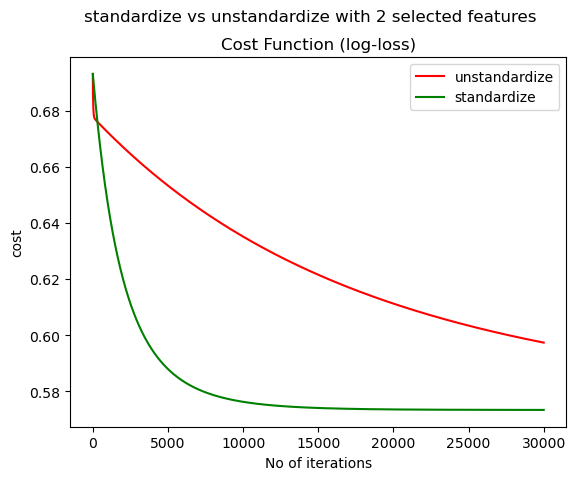

In [95]:
# Cost function plot
plt.plot(np.arange(len(l_4ai)), l_4ai, color='r', label='unstandardize')
plt.plot(np.arange(len(l_4aii)), l_4aii, color='g', label='standardize')
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("standardize vs unstandardize with 2 selected features")
plt.legend()
plt.show()

In [96]:
# Evaluation of model performace on testing data
y_4aii_testing_predict = predict(x_3c_testing_standardize,w_4aii,b_4aii)
eval_4aii = model_evaluation(y_testing,y_4aii_testing_predict)

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_4aii.performace_matric) 
print("Confusion Matrix:")
print(eval_4aii.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_4aii.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_4aii.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_4aii.accuracy*100, 2), "%")


Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.80    0.84      0.82
1       0.65    0.58      0.61
Confusion Matrix:
       0     1
0  11243  2885
1   2187  4038
Macro-F1 score of the model is :  0.72
Weighted-F1 score of the model is :  0.75
Accuracy of the model is :  75.08 %


Performance Evaluation of model on test dataset from Q4a)
Performance Matric:
   Precision  Recall  F1-score
0       0.79    0.82       0.8
1       0.62    0.57       0.6
Confusion Matrix:
       0     1
0  10975  2946
1   2455  3977
Macro-F1 score of the model is :  0.7
Weighted-F1 score of the model is :  0.73
Accuracy of the model is :  73.46 %

### 4b. Cost Function


### 4bi. Logistic regression with non-log Cost Function


In [99]:
# Logistic regression with different cost function
def trainLR_CF2(X, Y, learning_rate=0.001, iterations=30000):
    '''
    This function returns values of weights, bias and losses for trained model
    input:
        X --> Input feature set
        y --> True output values for training sets
        lam --> lamda (regularization )
        learning_rate --> learning rate 
        iterations --> number of iterations
    '''
    m,n = X.shape
    #m-> number of training values (number of rows)
    #n-> number of features (number of colums)

    # preprocess shape data shape
    X = X.T
    Y = Y.reshape(1, m)

    # Initializing weights, bias and losses.
    W = np.zeros((n,1))
    B = 0
    costlist = []
    
    for i in range(iterations):
        
        sig = np.dot(W.T, X) + B
        A = sigmoid(sig)
        
        # cost function
        cost = ((1/(2*m))*np.sum((A-Y)**2)) 
        #cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(((A-Y)*A*(1-A)), X.T) 
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        costlist.append(cost)
        
        # if(i%(iterations/10) == 0):
        #     print("cost after ", i, "iteration is : ", cost)


        # if len(costlist) > 2:
        #     loss_change = np.abs(costlist[-2]-costlist[-1])
        #     # print(w['time_in_hospital'][0], loss_change)
        #     if loss_change < tol:
        #         break
        #     else:
        #         continue
        
    # returning weights, bias and losses(List).
    return W, B, costlist

In [100]:
# Best lamda selected lamda = 
w_4b,b_4b,l_4b = trainLR_CF2(x_3c_training,y_training)
print("Logistic Regression Training 2 selected feature")
print('Weight ( length =', len(w_4b),")")
print(w_4b)
print('bias')
print(b_4b)

Logistic Regression Training 2 selected feature
Weight ( length = 2 )
[[0.06776566]
 [0.00416617]]
bias
-1.5110694867388637


### 4bii. Comparision


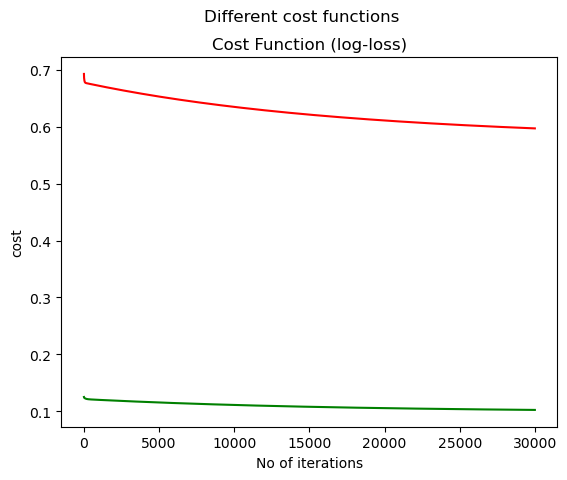

In [101]:
# Cost function plot
plt.plot(np.arange(len(l_4ai)), l_3c, color='r', label='logistic cost function')
plt.plot(np.arange(len(l_4b)), l_4b, color='g', label='mse cost function')
plt.xlabel("No of iterations")
plt.ylabel("cost")
plt.title("Cost Function (log-loss)")
plt.suptitle("Different cost functions")
plt.show()

In [103]:
# Evaluation of model performace on testing data
y_4b_testing_predict = predict(x_3c_testing,w_4b,b_4b)
eval_4b = model_evaluation(y_testing,y_4b_testing_predict)

print("Performance Evaluation of model on test dataset")
print("Performance Matric:")
print(eval_4b.performace_matric) 
print("Confusion Matrix:")
print(eval_4b.confusion_matrix)
print("Macro-F1 score of the model is : ", round(eval_4b.macroF1, 2))
print("Weighted-F1 score of the model is : ", round(eval_4b.weightedF1, 2))
print("Accuracy of the model is : ", round(eval_4b.accuracy*100, 2), "%")

Performance Evaluation of model on test dataset
Performance Matric:
   Precision  Recall  F1-score
0       0.79    0.82      0.81
1       0.62    0.58      0.60
Confusion Matrix:
       0     1
0  11023  2925
1   2407  3998
Macro-F1 score of the model is :  0.7
Weighted-F1 score of the model is :  0.74
Accuracy of the model is :  73.8 %


Logistic Regression Training select 2 features and unregularized logistic cost function
    Weight ( length = 2 )
    [[0.070786  ]
    [0.00297042]]
    bias
    -1.508439182127534


 Logistic Regression Training 2 selected feature and unregularized MSE cost function
    Weight ( length = 2 )
    [[0.06776566]
    [0.00416617]]
    bias
    -1.5110694867388637
